In [1]:
%pip install joblib pandas numpy matplotlib seaborn scikit-learn
import os
import joblib
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix
)

MODEL_DIR = "../src/models"
DATA_PATH = "../data/processed/cleaned_combined_data_utf8.csv"


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.7-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached scipy-1.16.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl (11.0 MB)
Using cached matplotlib-3.10.7-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl (8.7 MB)
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)
Using cached scipy-1.16.2-cp313-cp313-win_amd64.whl (38.5 MB)

   ---------------------------------------- 0/6 [scipy]
   ---------------------------------------- 0/6 [scipy]
   ---------------------------------------- 0/6 [scipy]
   ------------------

In [2]:
df = pd.read_csv(DATA_PATH)

print(f"Dataset shape: {df.shape}")
print("Categories:", df['category'].value_counts())

X = df['combined_text']
y = df['category']

Dataset shape: (12471, 7)
Categories: category
anxiety       1987
psychosis     1841
addiction     1740
ptsd           994
bipolar        973
bpd            967
ocd            962
autism         902
suicide        827
depression     726
adhd           552
Name: count, dtype: int64


In [3]:
log_reg = joblib.load(os.path.join(MODEL_DIR, "baseline_logistic_regression.pkl"))
rand_forest = joblib.load(os.path.join(MODEL_DIR, "baseline_random_forest.pkl"))
vectorizer = joblib.load(os.path.join(MODEL_DIR, "tfidf_vectorizer.pkl"))

with open(os.path.join(MODEL_DIR, "baseline_results.json"), "r") as f:
    results_summary = json.load(f)

print("Saved training results:")
print(json.dumps(results_summary, indent=2))

c:\Users\yagni\OneDrive\Desktop\mental-health-ai\.venv\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Saved training results:
{
  "timestamp": "20251006_204514",
  "logistic_regression_accuracy": 0.7326653306613227,
  "random_forest_accuracy": 0.6949899799599198,
  "models_saved": [
    "baseline_logistic_regression.pkl",
    "baseline_random_forest.pkl"
  ],
  "vectorizer_saved": "tfidf_vectorizer.pkl"
}


c:\Users\yagni\OneDrive\Desktop\mental-health-ai\.venv\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\yagni\OneDrive\Desktop\mental-health-ai\.venv\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\yagni\OneDrive\Desktop\mental-health-ai\.venv\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to 

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_test_tfidf = vectorizer.transform(X_test)

In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score

lr_pred = log_reg.predict(X_test_tfidf)

print("Logistic Regression Report")
print(classification_report(y_test, lr_pred))

lr_acc = accuracy_score(y_test, lr_pred)
lr_prec_macro = precision_score(y_test, lr_pred, average="macro")
lr_recall_macro = recall_score(y_test, lr_pred, average="macro")
lr_f1_macro = f1_score(y_test, lr_pred, average="macro")

lr_prec_weighted = precision_score(y_test, lr_pred, average="weighted")
lr_recall_weighted = recall_score(y_test, lr_pred, average="weighted")
lr_f1_weighted = f1_score(y_test, lr_pred, average="weighted")

print(f"\nLogistic Regression Metrics:")
print(f"Accuracy: {lr_acc:.4f}")
print(f"Precision (Macro): {lr_prec_macro:.4f}")
print(f"Recall (Macro):    {lr_recall_macro:.4f}")
print(f"F1 Score (Macro):  {lr_f1_macro:.4f}")
print(f"Precision (Weighted): {lr_prec_weighted:.4f}")
print(f"Recall (Weighted):    {lr_recall_weighted:.4f}")
print(f"F1 Score (Weighted):  {lr_f1_weighted:.4f}")

Logistic Regression Report
              precision    recall  f1-score   support

   addiction       0.90      0.90      0.90       348
        adhd       0.68      0.69      0.68       110
     anxiety       0.78      0.75      0.77       398
      autism       0.59      0.72      0.65       180
     bipolar       0.71      0.64      0.67       195
         bpd       0.74      0.77      0.76       194
  depression       0.39      0.46      0.42       145
         ocd       0.83      0.82      0.83       193
   psychosis       0.85      0.71      0.77       368
        ptsd       0.75      0.72      0.74       199
     suicide       0.54      0.66      0.59       165

    accuracy                           0.73      2495
   macro avg       0.71      0.71      0.71      2495
weighted avg       0.74      0.73      0.74      2495


Logistic Regression Metrics:
Accuracy: 0.7327
Precision (Macro): 0.7065
Recall (Macro):    0.7120
F1 Score (Macro):  0.7070
Precision (Weighted): 0.7443
Recall

In [6]:
rf_pred = rand_forest.predict(X_test_tfidf)

print("Random Forest Report")
print(classification_report(y_test, rf_pred))

rf_acc = accuracy_score(y_test, rf_pred)
rf_prec_macro = precision_score(y_test, rf_pred, average="macro")
rf_recall_macro = recall_score(y_test, rf_pred, average="macro")
rf_f1_macro = f1_score(y_test, rf_pred, average="macro")

rf_prec_weighted = precision_score(y_test, rf_pred, average="weighted")
rf_recall_weighted = recall_score(y_test, rf_pred, average="weighted")
rf_f1_weighted = f1_score(y_test, rf_pred, average="weighted")

print(f"\nRandom Forest Metrics:")
print(f"Accuracy: {rf_acc:.4f}")
print(f"Precision (Macro): {rf_prec_macro:.4f}")
print(f"Recall (Macro):    {rf_recall_macro:.4f}")
print(f"F1 Score (Macro):  {rf_f1_macro:.4f}")
print(f"Precision (Weighted): {rf_prec_weighted:.4f}")
print(f"Recall (Weighted):    {rf_recall_weighted:.4f}")
print(f"F1 Score (Weighted):  {rf_f1_weighted:.4f}")

Random Forest Report
              precision    recall  f1-score   support

   addiction       0.82      0.87      0.84       348
        adhd       0.69      0.67      0.68       110
     anxiety       0.81      0.72      0.76       398
      autism       0.41      0.76      0.53       180
     bipolar       0.69      0.63      0.66       195
         bpd       0.75      0.69      0.72       194
  depression       0.40      0.38      0.39       145
         ocd       0.79      0.80      0.80       193
   psychosis       0.90      0.59      0.71       368
        ptsd       0.81      0.70      0.75       199
     suicide       0.48      0.68      0.56       165

    accuracy                           0.69      2495
   macro avg       0.69      0.68      0.67      2495
weighted avg       0.73      0.69      0.70      2495


Random Forest Metrics:
Accuracy: 0.6950
Precision (Macro): 0.6869
Recall (Macro):    0.6805
F1 Score (Macro):  0.6736
Precision (Weighted): 0.7301
Recall (Weighted):

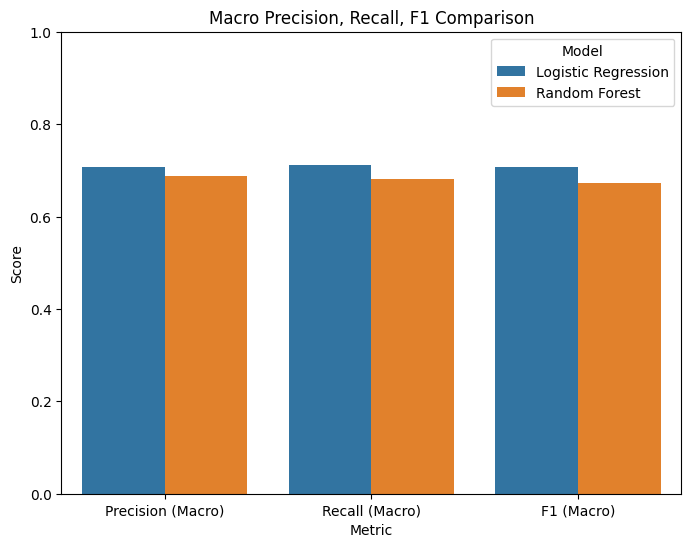

In [7]:
metrics_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Logistic Regression", "Logistic Regression",
              "Random Forest", "Random Forest", "Random Forest"],
    "Metric": ["Precision (Macro)", "Recall (Macro)", "F1 (Macro)",
               "Precision (Macro)", "Recall (Macro)", "F1 (Macro)"],
    "Score": [lr_prec_macro, lr_recall_macro, lr_f1_macro,
              rf_prec_macro, rf_recall_macro, rf_f1_macro]
})

plt.figure(figsize=(8,6))
sns.barplot(x="Metric", y="Score", hue="Model", data=metrics_df)
plt.ylim(0,1)
plt.title("Macro Precision, Recall, F1 Comparison")
plt.show()

In [8]:
sample_df = pd.DataFrame({
    "Text": X_test.sample(5, random_state=42)
})

sample_df["Actual"] = y_test.loc[sample_df.index]
sample_df["LogReg_Pred"] = log_reg.predict(vectorizer.transform(sample_df["Text"]))
sample_df["RF_Pred"] = rand_forest.predict(vectorizer.transform(sample_df["Text"]))

sample_df

,Text,Actual,LogReg_Pred,RF_Pred
4093,Tell me what you're currently anxious about an...,anxiety,anxiety,anxiety
10910,Feelings of re-experiencing are distressing af...,ptsd,ptsd,ptsd
6152,App for us bipolars I want to build an app tha...,bipolar,bipolar,bipolar
3930,"23 and never had an actual job, feeling lost. ...",anxiety,depression,bpd
1962,Mallinkrodt Generic = worthless Does anyone el...,adhd,adhd,adhd
